In [1]:
import pandas as pd

import numpy as np
import matplotlib as mpl
import math
from itertools import islice
import difflib

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
health = pd.read_csv('data/Overall_Health.csv')
len(health[(health['ANSWER_ID'] == 1) & (health['TAG'] == 'overall')])


13820

In [3]:
health

ST NAICS_SECTOR EMPCLASS EMPLOYEE_SIZE  INSTRUMENT_ID  \
0        -            -        -             -              1   
1        -            -        -             -              1   
2        -            -        -             -              1   
3        -            -        -             -              1   
4        -            -        -             -              1   
...     ..          ...      ...           ...            ...   
342641  WY            -        B  >=5 and <=19             10   
342642  WY            -        B  >=5 and <=19             13   
342643  WY            -        B  >=5 and <=19             16   
342644  WY            -        B  >=5 and <=19             16   
342645  WY            -        B  >=5 and <=19             19   

                                                 QUESTION  ANSWER_ID  \
0       Overall, how has this business been affected b...          1   
1       Overall, how has this business been affected b...          2   
2       Overall, how has this business been affected b...          3   
3       Overall, how has this business been affected b...          4   
4       Overall, how has this business been affected b...          5   
...                                                   ...        ...   
342641  In the last week, did this business have diffi...          2   
342642  The White House declared a national emergency ...          3   
342643  Comparing now to what was normal before March ...          1   
342644  Comparing now to what was normal before March ...          2   
342645  In the next 6 months, do you think this busine...          1   

                                            ANSWER_TEXT  ESTIMATE_PERCENTAGE  \
0                                 Large negative effect                0.514   
1                              Moderate negative effect                0.385   
2                                   Little or no effect                0.076   
3                              Moderate positive effect                0.017   
4                                 Large positive effect                0.008   
...                                                 ...                  ...   
342641                                               No                0.500   
342642  Little or no change in number of paid employees                0.554   
342643                         Large increase in prices                0.431   
342644                      Moderate increase in prices                0.389   
342645                                              Yes                0.425   

            SE  ...  TAG_NUM                TAG  \
0       0.0021  ...      1.0            overall   
1       0.0027  ...      1.0            overall   
2       0.0029  ...      1.0            overall   
3       0.0008  ...      1.0            overall   
4       0.0006  ...      1.0            overall   
...        ...  ...      ...                ...   
342641  0.0975  ...      9.0        hiring_diff   
342642  0.2018  ...     11.0    change_norm_emp   
342643  0.0912  ...     14.0  change_norm_price   
342644  0.1034  ...     14.0  change_norm_price   
342645  0.0966  ...     16.0    business_travel   

                              TAG_TITLE REGION  DIVISION IN_ANTHEM MULTIPLIED  \
0                        Overall effect      -         -         0      0.514   
1                        Overall effect      -         -         0      0.770   
2                        Overall effect      -         -         0      0.228   
3                        Overall effect      -         -         0      0.068   
4                        Overall effect      -         -         0      0.040   
...                                 ...    ...       ...       ...        ...   
342641     Dificulties hiring employees   West  Mountain         0      1.500   
342642    Change from normal: employees   West  Mountain         0      1.662   
342643  Change from normal: prices paid   West  Mountain   

In [126]:
health1 = health[(health['ANSWER_ID'] == 1) & (health['ST'] == '-')]
health1

ST NAICS_SECTOR EMPCLASS EMPLOYEE_SIZE  INSTRUMENT_ID  \
0      -            -        -             -              1   
5      -            -        -             -              2   
8      -            -        -             -              5   
11     -            -        -             -              6   
14     -            -        -             -              7   
16     -            -        -             -             11   
18     -            -        -             -             12   
276    -            -        -             -              1   
281    -            -        -             -              2   
284    -            -        -             -              5   
287    -            -        -             -              6   
290    -            -        -             -              7   
292    -            -        -             -             11   
294    -            -        -             -             12   
557    -            -        -             -              1   
562    -            -        -             -              2   
565    -            -        -             -              5   
568    -            -        -             -              6   
571    -            -        -             -              7   
573    -            -        -             -             11   
575    -            -        -             -             12   
838    -            -        -             -              1   
843    -            -        -             -              2   
846    -            -        -             -              5   
849    -            -        -             -              6   
852    -            -        -             -              7   
854    -            -        -             -             11   
856    -            -        -             -             12   
1121   -            -        -             -              1   
1126   -            -        -             -              2   
1129   -            -        -             -              5   
1132   -            -        -             -              6   
1135   -            -        -             -              7   
1137   -            -        -             -             11   
1139   -            -        -             -             12   
1403   -            -        -             -              1   
1408   -            -        -             -              2   
1411   -            -        -             -              5   
1414   -            -        -             -              6   
1417   -            -        -             -              7   
1419   -            -        -             -             11   
1421   -            -        -             -             12   
1685   -            -        -             -              1   
1690   -            -        -             -              2   
1693   -            -        -             -              5   
1696   -            -        -             -              6   
1699   -            -        -             -              7   
1701   -            -        -             -             11   
1703   -            -        -             -             12   
1966   -            -        -             -              1   
1971   -            -        -             -              2   
1974   -            -        -             -              5   
1977   -            -        -             -              6   
1980   -            -        -             -              7   
1982   -            -        -             -             11   
1984   -            -        -             -             12   
2246   -            -        -             -              1   
2251   -            -        -             -              2   
2254   -            -        -             -              5   
2257   -            -        -             -              6   
2260   -            -        -             -              7   
2262   -            -        -             -             11   
2264   -            -        -       

In [128]:
csvFl = health1.pivot(index='PHASE_WEEK', columns='TAG', values='SCALED_VALUE')
csvFl.dropna(axis = 1)

TAG         change_emp_hours  change_emp_num  change_rev  overall
PHASE_WEEK                                                       
1                     -0.456          -0.235      -0.681  -0.6900
2                     -0.365          -0.166      -0.601  -0.6620
3                     -0.263          -0.105      -0.513  -0.6525
4                     -0.201          -0.066      -0.459  -0.6350
5                     -0.166          -0.044      -0.384  -0.6160
6                     -0.145          -0.031      -0.335  -0.6030
7                     -0.100          -0.012      -0.235  -0.5820
8                     -0.101          -0.018      -0.218  -0.5780
9                     -0.112          -0.026      -0.227  -0.5715
10                    -0.091          -0.042      -0.255  -0.5280
11                    -0.076          -0.046      -0.232  -0.5100
12                    -0.076          -0.039      -0.217  -0.5080
13                    -0.083          -0.041      -0.220  -0.5000
14                    -0.071          -0.036      -0.216  -0.4915
15                    -0.084          -0.031      -0.221  -0.5000
16                    -0.072          -0.035      -0.210  -0.4890
17                    -0.070          -0.036      -0.202  -0.4880
18                    -0.079          -0.032      -0.215  -0.4830
19                    -0.116          -0.050      -0.274  -0.4765
20                    -0.141          -0.064      -0.307  -0.4790
21                    -0.168          -0.079      -0.322  -0.4860
22                    -0.186          -0.078      -0.331  -0.4880
23                    -0.172          -0.085      -0.330  -0.4875
24                    -0.161          -0.084      -0.316  -0.4870
25                    -0.168          -0.082      -0.326  -0.4835
26                    -0.221          -0.098      -0.361  -0.4825
27                    -0.205          -0.092      -0.354  -0.4880
28                    -0.137          -0.034      -0.259  -0.4725
29                    -0.124          -0.031      -0.246  -0.4710
30                    -0.067          -0.016      -0.182  -0.4535
31                    -0.042          -0.004      -0.137  -0.4575
32                    -0.030          -0.002      -0.113  -0.4525
33                    -0.016           0.004      -0.083  -0.4540
34                    -0.008           0.006      -0.050  -0.4375
35                    -0.002           0.007      -0.065  -0.4430
36                    -0.006           0.013      -0.075  -0.4285
37                     0.013           0.019      -0.076  -0.4255
38                     0.018           0.021      -0.062  -0.4255
39                     0.015           0.016      -0.058  -0.4165
40                     0.012           0.025      -0.071  -0.4195
41                     0.018           0.023      -0.057  -0.4165
42                     0.024           0.027      -0.052  -0.4140
43                     0.011           0.013      -0.051  -0.4070
44                    -0.012          -0.002      -0.076  -0.4060
45                    -0.008           0.002      -0.091  -0.4120
46                    -0.059          -0.041      -0.162  -0.4155
47                    -0.065          -0.054      -0.170  -0.4115
48                    -0.071          -0.048      -0.167  -0.4035
49                    -0.070          -0.042      -0.173  -0.4005
50                    -0.074          -0.039      -0.171  -0.4030
51                    -0.057          -0.043      -0.163  -0.4080
52                    -0.057          -0.043      -0.159  -0.3985
53                    -0.052          -0.033      -0.150  -0.4010
54                    -0.056          -0.032      -0.159  -0.3960
55                    -0.059          -0.040      -0.145  -0.3925

In [119]:
weeks = pd.read_csv('data/Weeks.csv')
num = math.ceil(len(weeks)/9) # Get number of phases
num
# Create one big list to store all phases & append phases to list
csvList = []
count1 = 0
count9 = 9
for i in range(num):
    csvList.append(csvFl.iloc[count1:count9:])
    count1 += 9
    count9 += 9
    #print(count1, count9)
csvList[0].dropna(axis = 1)

TAG         change_emp_hours  change_emp_num  change_rev  missed_loans  \
PHASE_WEEK                                                               
1                     -0.456          -0.235      -0.681         0.770   
2                     -0.365          -0.166      -0.601         0.786   
3                     -0.263          -0.105      -0.513         0.800   
4                     -0.201          -0.066      -0.459         0.886   
5                     -0.166          -0.044      -0.384         0.898   
6                     -0.145          -0.031      -0.335         0.894   
7                     -0.100          -0.012      -0.235         0.908   
8                     -0.101          -0.018      -0.218         0.906   
9                     -0.112          -0.026      -0.227         0.906   

TAG         missed_other  overall  supply_chain  
PHASE_WEEK                                       
1                  0.528  -0.6900         0.102  
2                  0.568  -0.6620         0.136  
3                  0.590  -0.6525         0.166  
4                  0.668  -0.6350         0.200  
5                  0.704  -0.6160         0.260  
6                  0.702  -0.6030         0.284  
7                  0.720  -0.5820         0.332  
8                  0.722  -0.5780         0.360  
9                  0.730  -0.5715         0.360

In [67]:
csvList2 = []
for dataset in csvList:
    csvList2.append(dataset.dropna(axis = 1))
csvList2[5]

TAG         business_travel  change_emp_hours  change_emp_num  \
PHASE_WEEK                                                      
46                   -0.045            -0.059          -0.041   
47                   -0.049            -0.065          -0.054   
48                   -0.041            -0.071          -0.048   
49                   -0.037            -0.070          -0.042   
50                   -0.030            -0.074          -0.039   
51                   -0.030            -0.057          -0.043   
52                   -0.026            -0.057          -0.043   
53                   -0.022            -0.052          -0.033   
54                   -0.006            -0.056          -0.032   

TAG         change_norm_demand  change_norm_emp  change_norm_price  \
PHASE_WEEK                                                           
46                     -0.0295          -0.1365            -0.4785   
47                     -0.0300          -0.1290            -0.4805   
48                     -0.0295          -0.1295            -0.4735   
49                     -0.0265          -0.1375            -0.4760   
50                     -0.0320          -0.1320            -0.4770   
51                     -0.0215          -0.1370            -0.4845   
52                     -0.0160          -0.1390            -0.4800   
53                     -0.0185          -0.1350            -0.4910   
54                     -0.0110          -0.1270            -0.4940   

TAG         change_rev  covid_test_neg  covid_vac_proof  export_rev  \
PHASE_WEEK                                                            
46              -0.162          -0.703           -0.692      -0.346   
47              -0.170          -0.688           -0.689      -0.348   
48              -0.167          -0.677           -0.669      -0.342   
49              -0.173          -0.668           -0.658      -0.333   
50              -0.171          -0.680           -0.654      -0.334   
51              -0.163          -0.684           -0.638      -0.339   
52              -0.159          -0.680           -0.635      -0.336   
53              -0.150          -0.683           -0.627      -0.340   
54              -0.159          -0.688           -0.626      -0.328   

TAG         hiring_diff  overall  
PHASE_WEEK                        
46               -0.061  -0.4155  
47               -0.042  -0.4115  
48               -0.049  -0.4035  
49               -0.057  -0.4005  
50               -0.038  -0.4030  
51               -0.040  -0.4080  
52               -0.044  -0.3985  
53               -0.033  -0.4010  
54               -0.040  -0.3960

In [71]:
for dataset in csvList2:
    dataset['AVERAGE'] = dataset.mean(axis=1)

/tmp/ipykernel_1179/1187134625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['AVERAGE'] = dataset.mean(axis=1)


In [110]:
csvList3 = []
for dataset in csvList2:
    x = dataset
    pca = PCA(n_components=5)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
    csvList3.append(principalDf)
    
csvList4 = pd.concat(csvList3)
csvList4 = csvList4.reset_index(drop=True)


In [76]:
Average = pd.concat(csvList2)

In [111]:
Average = csvList4.mean(axis=1)
Average

0     0.084185
1     0.064030
2     0.048395
3     0.019395
4    -0.013707
5    -0.024258
6    -0.050215
7    -0.063044
8    -0.064781
9     0.013313
10    0.002672
11   -0.001536
12   -0.000179
13   -0.001301
14   -0.000747
15   -0.004502
16   -0.006961
17   -0.000757
18    0.015640
19    0.008720
20    0.000481
21   -0.006570
22    0.000804
23    0.003827
24    0.000601
25   -0.014160
26   -0.009343
27    0.042338
28    0.029162
29    0.008079
30   -0.002705
31   -0.006979
32   -0.014153
33   -0.014367
34   -0.020307
35   -0.021069
36    0.002470
37    0.003589
38    0.003891
39    0.004329
40    0.004604
41    0.003372
42    0.000906
43   -0.013423
44   -0.009737
45   -0.006333
46   -0.005487
47   -0.006500
48   -0.009256
49    0.001495
50    0.003953
51    0.001425
52    0.010608
53    0.010095
dtype: float64

(-1.0, 1.0)

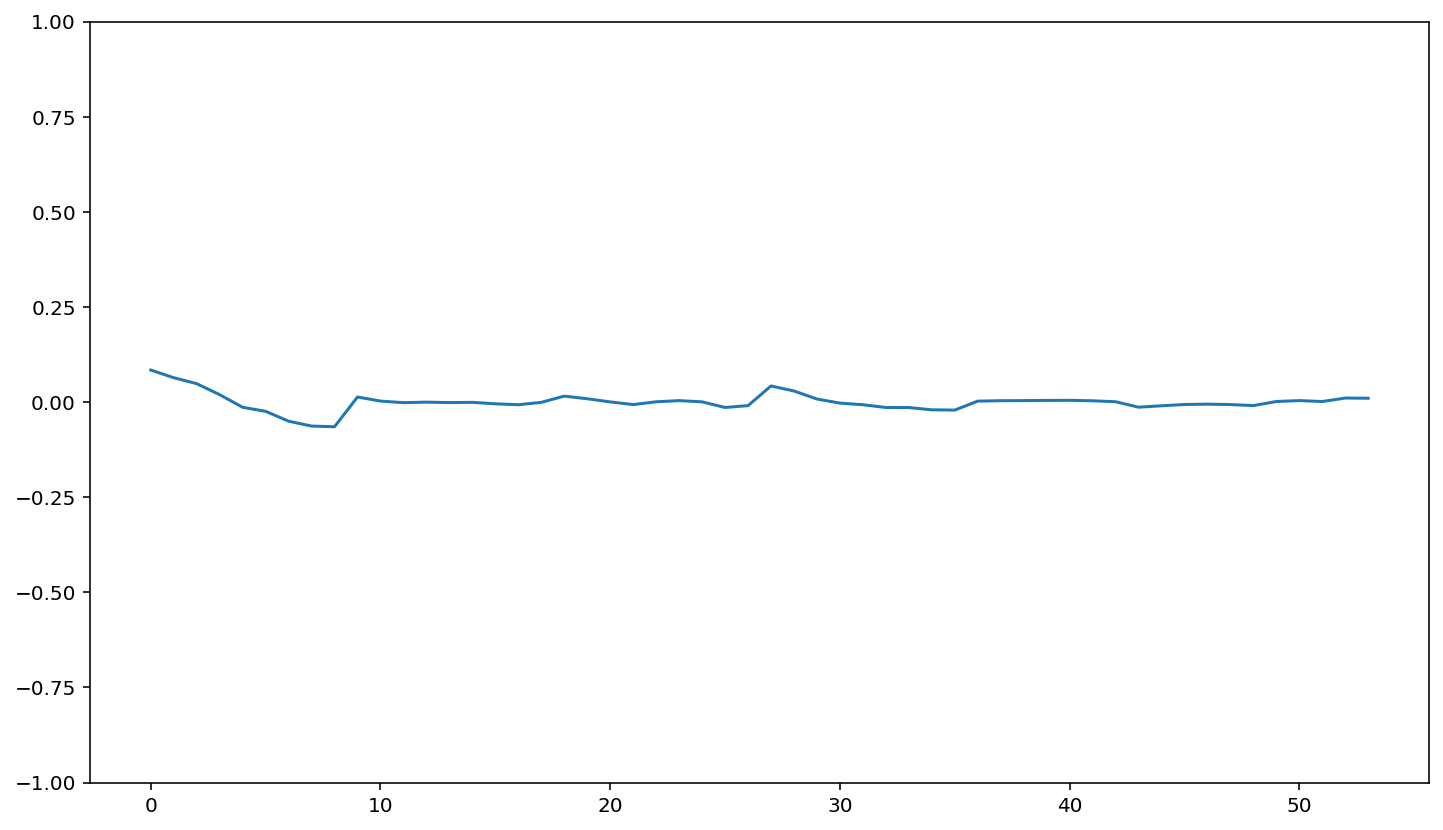

In [112]:
ax1 = Average.plot()
ax1.set_ylim(-1,1)